In [909]:
import pandas as pd
import json
import os
import requests
from datetime import datetime, timezone
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import statsmodels.api as sms
from tensorflow.keras.layers import Dropout

In [910]:
!pip install pmdarima


In [911]:
url = "https://merolagani.com/handlers/TechnicalChartHandler.ashx?type=get_advanced_chart&symbol=SBL&resolution=1D&rangeStartDate=1642676807&rangeEndDate=1768820807&from=&isAdjust=1&currencyCode=NPR"
response = requests.get(url)
data = response.json()


with open("Siddhartha.json", "w") as f:
    json.dump(data, f)

In [912]:
companies = ["/content/Siddhartha.json"]

for symbol in companies:
    with open(f"{symbol}", 'r') as f:
        data = json.load(f)
        print(data)
    dates = [datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d') for ts in data['t']]
    df=pd.DataFrame({
    "Date":dates,
    "Open":data['o'],
    "Close":data['c'],
    "High":data['h'],
    "Low":data['l'],
    "Volume":data['v']

})
    csv_filename = os.path.basename(symbol).replace('.json', '.csv')
    print(csv_filename)
    df.to_csv(csv_filename,index=False)
    print(f"{csv_filename}created")

{'t': [1642711500, 1642970700, 1643057100, 1643143500, 1643229900, 1643316300, 1643575500, 1643661900, 1643748300, 1643921100, 1644180300, 1644266700, 1644353100, 1644439500, 1644525900, 1644785100, 1644871500, 1644957900, 1645044300, 1645130700, 1645389900, 1645476300, 1645562700, 1645649100, 1645735500, 1645994700, 1646081100, 1646253900, 1646599500, 1646685900, 1646858700, 1646945100, 1647204300, 1647290700, 1647377100, 1647463500, 1647809100, 1647895500, 1647981900, 1648068300, 1648154700, 1648413900, 1648500300, 1648586700, 1648673100, 1648759500, 1649018700, 1649105100, 1649191500, 1649277900, 1649364300, 1649709900, 1649796300, 1649882700, 1650228300, 1650314700, 1650401100, 1650487500, 1650573900, 1650833100, 1650919500, 1651005900, 1651092300, 1651178700, 1651524300, 1651697100, 1651783500, 1652042700, 1652129100, 1652215500, 1652301900, 1652388300, 1652820300, 1652906700, 1652993100, 1653079500, 1653338700, 1653425100, 1653511500, 1653597900, 1653684300, 1653943500, 165402990

In [913]:
df = pd.read_csv("Siddhartha.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
print(len(df))

925


In [914]:
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2022-01-20,397.89,395.77,398.73,391.96,62906.0
2022-01-23,396.02,399.58,411.69,394.50,140926.0
2022-01-24,407.53,387.72,407.53,381.80,170021.0
2022-01-25,395.43,384.34,395.43,377.56,94791.0
2022-01-26,389.42,377.40,389.42,376.72,70434.0


In [915]:
df.tail()

,Open,Close,High,Low,Volume
Date,,,,,
2026-01-08,391.1,397.9,398.9,390.0,188567.0
2026-01-12,400.0,390.6,400.1,390.6,113557.0
2026-01-13,387.0,385.1,398.0,384.0,146541.0
2026-01-14,380.0,385.8,399.0,380.0,79807.0
2026-01-18,387.0,388.9,393.0,385.6,69431.0


In [916]:
type(df)

pandas.core.frame.DataFrame

In [917]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 925 entries, 2022-01-20 to 2026-01-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    925 non-null    float64
 1   Close   925 non-null    float64
 2   High    925 non-null    float64
 3   Low     925 non-null    float64
 4   Volume  925 non-null    float64
dtypes: float64(5)
memory usage: 43.4 KB


<Axes: xlabel='Date'>

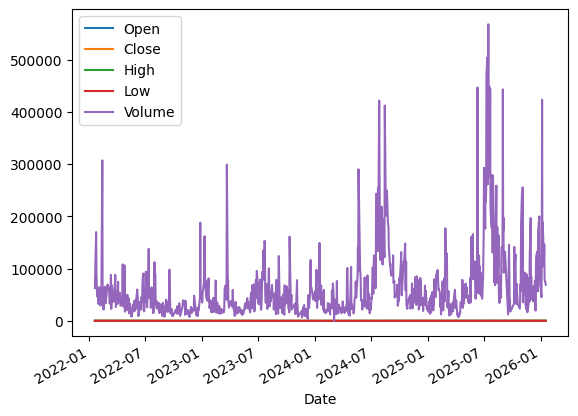

In [918]:
df.plot()

In [919]:
def plot_graph(figsize, df_to_plot, column_name):

    plt.figure(figsize=figsize)
    plt.plot(df_to_plot.index, df_to_plot[column_name], label=column_name)
    plt.title(f"Siddhartha{column_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

In [920]:
type(df['Close'])

pandas.core.series.Series

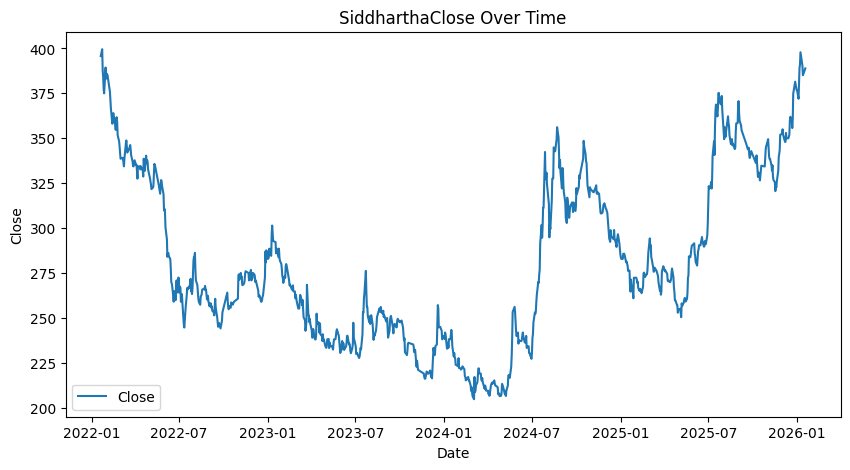

In [921]:
import matplotlib.pyplot as plt
plot_graph((10, 5), df, "Close")


#DICKEY FULLER TEST

In [922]:
from statsmodels.tsa.stattools import adfuller

In [923]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('The series is stationary.')
    else:
        print('The series is not stationary.')

In [924]:
adf_test(df['Close'])

ADF Statistic: -1.7270807179238592
p-value: 0.41721644605488695
The series is not stationary.


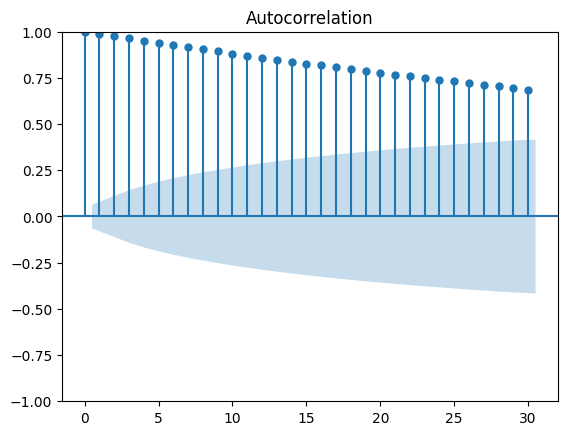

In [925]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df['Close'])

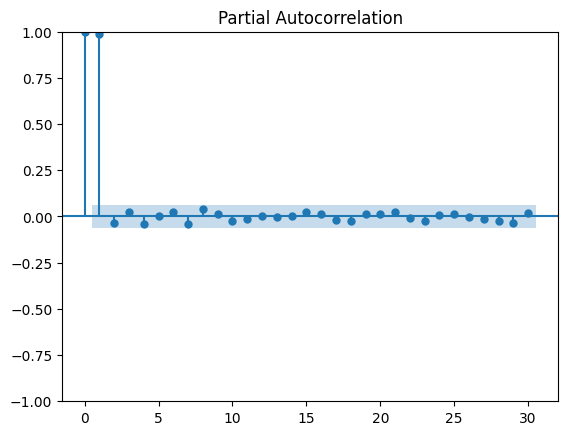

In [926]:
pacf = plot_pacf(df['Close'])

In [927]:
#using differencing
df['Close_first_difference'] = df['Close']-df['Close'].shift(1)

In [928]:
df.head()

,Open,Close,High,Low,Volume,Close_first_difference
Date,,,,,,
2022-01-20,397.89,395.77,398.73,391.96,62906.0,NaN
2022-01-23,396.02,399.58,411.69,394.50,140926.0,3.81
2022-01-24,407.53,387.72,407.53,381.80,170021.0,-11.86
2022-01-25,395.43,384.34,395.43,377.56,94791.0,-3.38
2022-01-26,389.42,377.40,389.42,376.72,70434.0,-6.94


In [929]:
data=df['Close_first_difference'].dropna()
adf_test(data)

ADF Statistic: -16.033389472082572
p-value: 6.022835885048969e-29
The series is stationary.


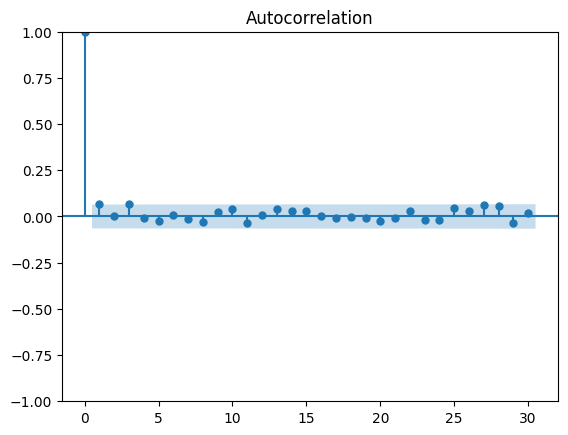

In [930]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data)

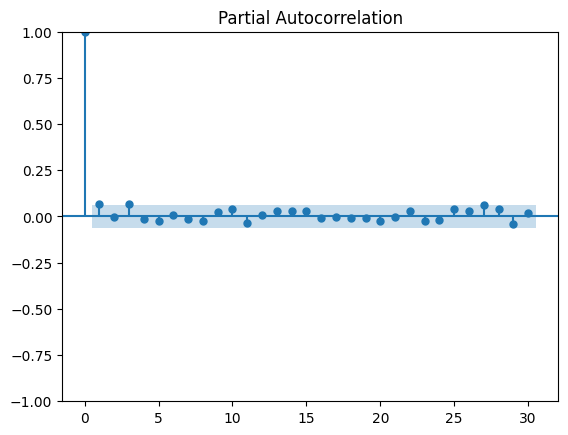

In [931]:
result = plot_pacf(data)

In [932]:
from statsmodels.stats.diagnostic import acorr_ljungbox

res = ARIMA(data, order=(3,1,1)).fit()
acorr_ljungbox(res.resid, lags=[10,15,20], return_df=True)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



,lb_stat,lb_pvalue
10,4.160095,0.939836
15,7.564079,0.940069
20,8.915834,0.983862


In [933]:
to_row=int(len(df)*0.8)
training_data = list(df['Close'].iloc[0:to_row])
testing_data  = list(df['Close'].iloc[to_row:])


In [934]:
testing_data

[265.12,
 267.33,
 262.94,
 264.81,
 275.83,
 278.78,
 277.12,
 275.96,
 276.53,
 274.56,
 270.88,
 270.34,
 270.85,
 269.88,
 271.38,
 275.02,
 277.52,
 272.46,
 266.88,
 264.28,
 259.8,
 259.85,
 257.36,
 257.17,
 252.94,
 254.36,
 255.19,
 252.94,
 250.41,
 258.1,
 256.71,
 258.32,
 261.06,
 261.01,
 259.1,
 260.55,
 260.55,
 263.88,
 272.44,
 273.58,
 284.26,
 283.79,
 285.7,
 288.41,
 290.21,
 291.56,
 285.84,
 284.37,
 281.16,
 279.16,
 283.24,
 287.3,
 288.11,
 290.49,
 290.43,
 292.17,
 293.43,
 295.04,
 292.76,
 289.7,
 289.8,
 292.79,
 291.41,
 291.04,
 295.92,
 302.18,
 313.6,
 323.31,
 321.96,
 323.67,
 325.71,
 322.05,
 327.12,
 339.96,
 348.36,
 340.7,
 356.29,
 365.5,
 368.79,
 362.18,
 366.68,
 375.1,
 375.24,
 371.43,
 368.88,
 371.1,
 373.57,
 366.11,
 361.66,
 349.51,
 356.11,
 355.59,
 350.86,
 353.89,
 362.21,
 358.43,
 357.04,
 351.61,
 346.77,
 347.28,
 349.53,
 346.1,
 347.09,
 344.64,
 343.99,
 344.86,
 353.78,
 358.35,
 358.5,
 370.26,
 370.69,
 363.58,
 359.8

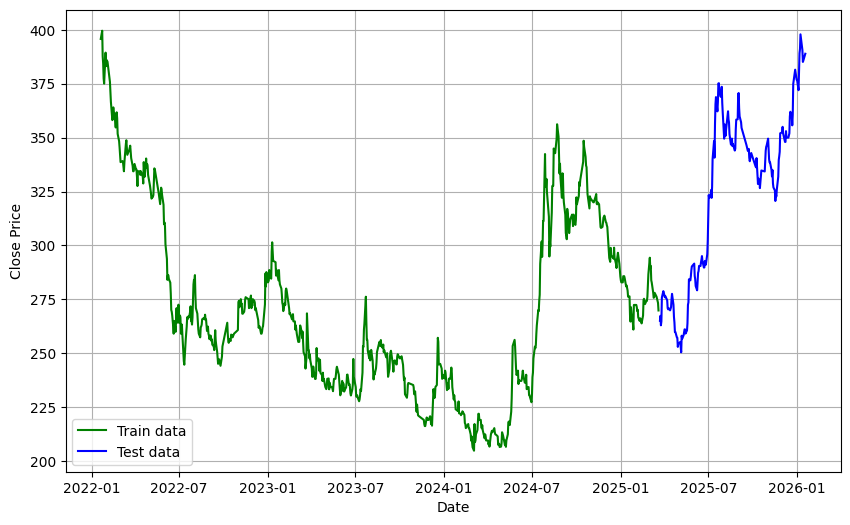

In [935]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df[0:to_row]['Close'],'green',label='Train data')
plt.plot(df[to_row:]['Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [936]:
model_predictions=[]
n_test_obser = len(testing_data)

In [937]:
from statsmodels.tsa.arima.model import ARIMA
model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(3,1,1))
    model_fit = model.fit()

    output = model_fit.forecast(steps=1)
    yhat = output[0]

    model_predictions.append(yhat)
    training_data.append(testing_data[i])



In [938]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  924
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -2751.725
Date:                Tue, 20 Jan 2026   AIC                           5513.451
Time:                        18:03:37   BIC                           5537.589
Sample:                             0   HQIC                          5522.660
                                - 924                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0697      0.375     -0.186      0.852      -0.804       0.664
ar.L2          0.0044      0.036      0.121      0.903      -0.066       0.075
ar.L3          0.0682      0.028      2.467      0.0

In [939]:
print(type(model_predictions))
print(np.array(model_predictions).shape)
print(model_predictions)


<class 'list'>
(185,)
[np.float64(269.6487176681858), np.float64(264.92111733892125), np.float64(267.2312016628769), np.float64(262.5607048871672), np.float64(265.079413142218), np.float64(275.8807194270612), np.float64(279.0499980932325), np.float64(277.63714075754365), np.float64(275.9197646029499), np.float64(276.46275849708394), np.float64(274.44431487091333), np.float64(270.800293311737), np.float64(270.21219043621886), np.float64(270.6942891714896), np.float64(269.86239285111185), np.float64(271.4658892844571), np.float64(275.0827717401792), np.float64(277.70112766740095), np.float64(272.43321528896746), np.float64(266.79296022675055), np.float64(263.8990875876129), np.float64(259.40763955393845), np.float64(259.798488286631), np.float64(257.0206407417179), np.float64(257.2532405170479), np.float64(252.60135899725904), np.float64(254.47779549139696), np.float64(254.95673751533357), np.float64(253.00843308855906), np.float64(250.321160842982), np.float64(258.2841190011797), np.flo

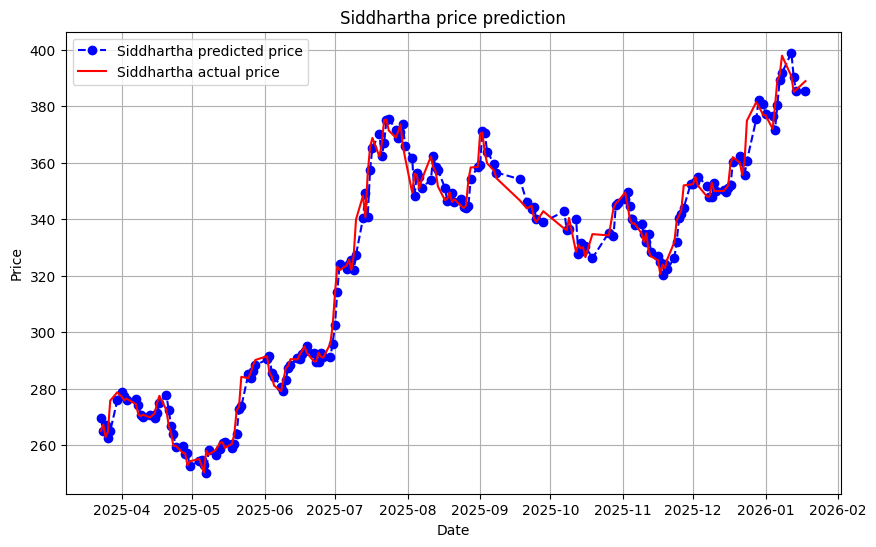

In [940]:
plt.figure(figsize=(10,6))
plt.grid(True)

date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue',marker='o',linestyle='dashed',label='Siddhartha predicted price')
plt.plot(date_range, testing_data,color='red',label='Siddhartha actual price')

plt.title('Siddhartha price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [941]:
mape= np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.array(testing_data))
print('Mape:'+str(mape))

Mape:0.01104455928346342


In [942]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(testing_data, model_predictions))
print("RMSE:", rmse)


RMSE: 4.76093465412392


In [943]:
# Import libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go


final_model = ARIMA(df['Close'], order=(3,1,1))
final_model_fit = final_model.fit()

# --- Forecast next 5 days with confidence intervals ---
forecast = final_model_fit.get_forecast(steps=1)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()



# --- Create future dates starting after last date in df ---
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')

# --- Interactive plot with plotly ---
fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Historical'
))

# Forecast
fig.add_trace(go.Scatter(
    x=future_dates,
    y=mean_forecast.values,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='red', dash='dash')
))

# Confidence interval
fig.add_trace(go.Scatter(
    x=list(future_dates) + list(future_dates[::-1]),
    y=list(conf_int.iloc[:,0]) + list(conf_int.iloc[:,1][::-1]),
    fill='toself',
    fillcolor='rgba(255,182,193,0.3)',  # light pink
    line=dict(color='rgba(255,182,193,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='95% CI'
))

fig.update_layout(
    title='Stock Price Forecast with 95% Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Close Price',
    template='plotly_white'
)

fig.show()

# --- Print next day prediction safely ---
print("Next trading day prediction:", float(mean_forecast.iloc[0]))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

Next trading day prediction: 388.79769661641933


In [944]:
print(forecast)


#AUTO_ARIMA

In [945]:
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Suppose df['Close'] has your stock prices
# Example: df = pd.read_csv("NTC.csv", parse_dates=['Date'], index_col='Date')

# --- Step 1: Use auto_arima to find best p,d,q ---
auto_model = pm.auto_arima(
    df['Close'],
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    d=None,               # if None, automatically test for differencing
    seasonal=False,       # change to True if you suspect seasonality
    stepwise=True,        # faster search
    suppress_warnings=True,
    trace=True            # prints search progress
)

print("Best ARIMA order:", auto_model.order)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6093.429, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5868.256, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6091.429, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5739.166, Time=0.46 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=5700.778, Time=0.98 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=5677.593, Time=1.28 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=5653.356, Time=1.42 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.40 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.45 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=5651.359, Time=0.29 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=5675.596, Time=0.22 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.98 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.80 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit t

In [946]:
import pickle
with open("arima_model_historical_siddhartha.pkl", "wb") as f:
    pickle.dump(final_model_fit, f)

print("Model saved as arima_model.pkl")


Model saved as arima_model.pkl
